# MEMS 1029 - Lecture 1 - Example
*Stephen Ludwick, University of Pittsburgh*  

This skeleton of a document is intended to help you to get started with using
Jupyter Notebooks in the preparation of your homework assignments.

Reuse any parts that you would like, and post questions to the course
Discussion Board.

## Consider a power transmitting countershaft with a gear reduction
This exercise is based on question 3-84 (3-73 old edition) in your text.

You are given a shaft, supported by two bearings, and carrying two gears.
Gear $A$ receives power from another gear with force $F_A$ applied at a 20° pressure angle.
The power is transmitted through the shaft and delivered through gear $B$.
Gear $B$ transmits force to yet another gear with a force $F_B$ at a 25° pressure angle.

*Given:*
$F_A = 11\,\mathrm{kN}$, $d_A = 600\,\mathrm{mm}$, and $d_B = 300\,\mathrm{mm}$


*copyrighted image not included here*

Begin by importing the relevant Python libraries.
*Matplotlib* is a plotting package used for making graphs, and *numpy* is a scientific computing library.
The syntax for both is somewhat similar to the MATLAB language.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

Next, set the known input variables. I prefer to work in units of "mks" or meter-kilogram-second,
but consistency is the most important factor.

Notice that we call the value of $\pi$  from the numpy library with the command `np.pi`,
and that a pound or hashtag symbol (#) denotes a comment.

In [2]:
F_A = 11e3   # N, force applied to gear A

d_A = 0.600   # m, pitch diameter of gear A
d_B = 0.300   # m, pitch diameter of gear B

theta_A = 20.*(np.pi/180.)  # rad, pressure angle of gear A
theta_B = 25.*(np.pi/180.)  # rad, pressure angle of gear B

dist_OA = 0.400  # m, distance from the bearing at the origin to gear A 
dist_OB = 0.750  # m, distance from the bearing at the origin to gear B
dist_OC = 1.050  # m, distance from the bearing at the origin to the bearing at C

### (a) Determine the force on gear B

The first part of the problem asks that we find the value of the force $F_B$
when the shaft is in static equilibrium.
We do this by setting the sum of the moments around the shaft axis (axis $x$)
equal to zero,
$$ \Sigma M_x = (F_A \cos \theta_A ) (d_A / 2) - (F_B \cos \theta_B ) (d_B / 2) = 0,$$
and then solving algebraically for $F_B$ gives us
$$ F_B = F_A \cdot \frac{d_A \cos \theta_A}{d_B \cos \theta_B}.$$

Implement in code, and solve for the numerical value.

Notice that a cosine is called with `np.cos(angle_in_radians)`,
and that you can format the `print` statement to report the answer
to an appropriate number of significant figures and in the requested units.

In [3]:
# (a) Determine the force on gear B
F_B = (F_A*d_A*np.cos(theta_A))/(d_B*np.cos(theta_B))
print('The force acting on gear B is {:.3f} kN'.format(F_B*1e-3))

The force acting on gear B is 22.810 kN


### (b) Find the bearing reaction forces, assuming that the shaft is running at a constant speed.

The reaction forces applied by the bearings at $O$ and $C$ will have components in the $y$ and $z$ directions.
We therefore separate the problem into two planes ($xy$ and $xz$) and solve each of them independently.

We again apply the equations for static equilibrium,

$$ \Sigma F_z = 0 = R_{Oz} - F_A \cos \theta_A + F_B \cos \theta_B + R_{Cz} $$
$$ \Sigma F_y = 0 = R_{Oy} - F_A \sin \theta_A - F_B \sin \theta_B + R_{Cy}$$

and

$$ \Sigma M_y = 0 = F_a \delta_{OA} \cos \theta_A - F_B \delta_{OB} \cos \theta_B - R_{Cz} \delta_{OC}$$
$$ \Sigma M_z = 0 = -F_A \delta_{OA} \sin \theta_A - F_B \delta_{OB} \sin \theta_B - R_{Cy} \delta_{OC}$$

and have a pair of two-equation, two-unknown problems to solve.


We could solve these algebraically, but the `sympy` package in Python can do so for us as well.
Just make sure to update your imports in the cell above to call it.
You could import the library at any time in the code,
but it's good practice to import all  required libraries together at the top.

In [4]:
# (b) Find the bearing reaction forces, assuming the shaft is running at constant speed

sym.init_printing()
R_Oy, R_Oz, R_Cy, R_Cz = sym.symbols('R_Oy,R_Oz,R_Cy,R_Cz')
eq1 = sym.Eq(R_Oz - F_A*np.cos(theta_A) + F_B*np.cos(theta_B) + R_Cz, 0 )
eq2 = sym.Eq(R_Oy - F_A*np.sin(theta_A) - F_B*np.sin(theta_B) + R_Cy, 0 )
eq3 = sym.Eq( F_A*np.cos(theta_A)*dist_OA - F_B*np.cos(theta_B)*dist_OB - R_Cz*dist_OC, 0 )
eq4 = sym.Eq(-F_A*np.sin(theta_A)*dist_OA - F_B*np.sin(theta_B)*dist_OB + R_Cy*dist_OC, 0 )
sol = sym.solve([eq1, eq2, eq3, eq4],(R_Oy,R_Oz,R_Cy,R_Cz))

print(sol)
R_Oy = sol[R_Oy]
R_Oz = sol[R_Oz]
R_Cy = sol[R_Cy]
R_Cz = sol[R_Cz]

{R_Cz: -10828.8387728662, R_Oz: 492.219944221190, R_Cy: 8319.00515187849, R_Oy: 5083.30546315651}


### (c) Draw the shear force and bending moment diagrams for the shaft

You will create four diagrams in total: shear and bending moment in each of the $xy$ and $xy$ planes.
There are certainly more elegant (or more "pythonic") ways to perform the calculation,
but the example below serves the purpose with a series of if-then-else statements.

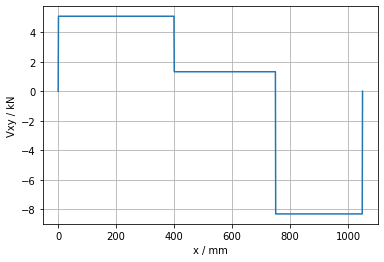

In [5]:
# (c) Draw the shear force and bending moment diagrams for the shaft.
# If needed, make one set for the horizontal plane and another set for the vertical plane

x = np.linspace(0, dist_OC, 1000)
V_xy = np.zeros_like(x)
for idx, loc in enumerate(x):
    if loc < dist_OA:
        V_xy[idx] = R_Oy
    elif ((loc >= dist_OA) and (loc < dist_OB)):
        V_xy[idx] = R_Oy - F_A*np.sin(theta_A)
    elif ((loc >= dist_OB) and (loc < dist_OC)):
        V_xy[idx] = R_Oy - F_A*np.sin(theta_A) - F_B*np.sin(theta_B)
    else:
        V_xy[idx] = R_Oy - F_A*np.sin(theta_A) - F_B*np.sin(theta_B) + R_Cy
    V_xy[0] = 0

plt.plot(1e3*x, 1e-3*V_xy)
plt.grid(True)
plt.xlabel('x / mm')
plt.ylabel('Vxy / kN');

The remainder of the exercise is left for you to work through.